In [26]:
import pandas as pd
import seaborn as sns

In [48]:
train_df = pd.read_csv("data/meal/train.csv")
train_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [49]:
train_df = train_df[(train_df['center_id'] == 66) & (train_df['meal_id'] == 2139)]
train_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
762,1134760,1,66,2139,455.93,456.93,0,0,26
3680,1464950,2,66,2139,440.41,439.41,0,0,41
12331,1140446,5,66,2139,455.93,456.93,0,0,28
15189,1200042,6,66,2139,454.93,454.93,0,0,27
18012,1495369,7,66,2139,455.93,455.93,0,0,15
...,...,...,...,...,...,...,...,...,...
441039,1094670,141,66,2139,267.75,267.75,0,0,69
444298,1016367,142,66,2139,267.75,266.75,0,0,67
447549,1398214,143,66,2139,275.48,277.48,0,0,26
450853,1300881,144,66,2139,282.33,282.33,0,0,80


In [50]:
train_df.set_index(keys=["week"], inplace=True)
train_df.sort_index(inplace=True)
train_df

,id,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
week,,,,,,,,
1,1134760,66,2139,455.93,456.93,0,0,26
2,1464950,66,2139,440.41,439.41,0,0,41
5,1140446,66,2139,455.93,456.93,0,0,28
6,1200042,66,2139,454.93,454.93,0,0,27
7,1495369,66,2139,455.93,455.93,0,0,15
...,...,...,...,...,...,...,...,...
141,1094670,66,2139,267.75,267.75,0,0,69
142,1016367,66,2139,267.75,266.75,0,0,67
143,1398214,66,2139,275.48,277.48,0,0,26


<Axes: >

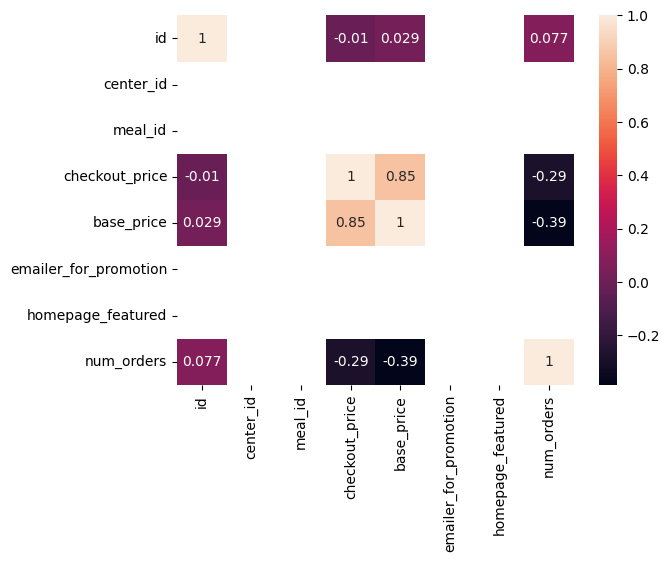

In [51]:
sns.heatmap(train_df.corr(), annot=True)

In [52]:
train_df.isnull().sum()

id                       0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [53]:
train_df.drop(columns=['id', 'homepage_featured', 'emailer_for_promotion', 'center_id', 'meal_id'], inplace=True)
train_df

C:\Users\spase\AppData\Local\Temp\ipykernel_11576\2458391114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(columns=['id', 'homepage_featured', 'emailer_for_promotion', 'center_id', 'meal_id'], inplace=True)


,checkout_price,base_price,num_orders
week,,,
1,455.93,456.93,26
2,440.41,439.41,41
5,455.93,456.93,28
6,454.93,454.93,27
7,455.93,455.93,15
...,...,...,...
141,267.75,267.75,69
142,267.75,266.75,67
143,275.48,277.48,26


<Axes: >

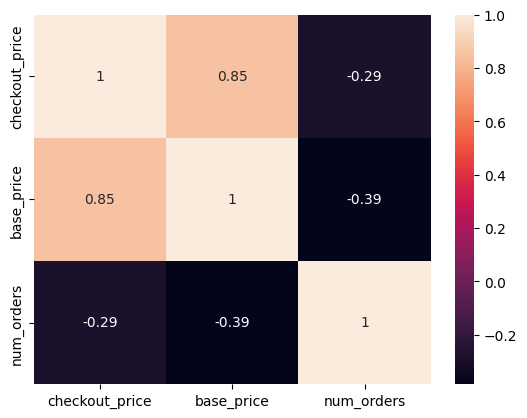

In [54]:
sns.heatmap(train_df.corr(), annot=True)

In [55]:
features = ['checkout_price', 'base_price']
target = 'num_orders'

In [56]:
lags = range(5, 0, -1)
list(lags)

[5, 4, 3, 2, 1]

In [57]:
for lag in lags:
    for column in features + [target]:
        train_df[f"{column}_{lag}"] = train_df[column].shift(lag)
train_df

C:\Users\spase\AppData\Local\Temp\ipykernel_11576\1732395222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[f"{column}_{lag}"] = train_df[column].shift(lag)
C:\Users\spase\AppData\Local\Temp\ipykernel_11576\1732395222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[f"{column}_{lag}"] = train_df[column].shift(lag)
C:\Users\spase\AppData\Local\Temp\ipykernel_11576\1732395222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,checkout_price,base_price,num_orders,checkout_price_5,base_price_5,num_orders_5,checkout_price_4,base_price_4,num_orders_4,checkout_price_3,base_price_3,num_orders_3,checkout_price_2,base_price_2,num_orders_2,checkout_price_1,base_price_1,num_orders_1
week,,,,,,,,,,,,,,,,,,
1,455.93,456.93,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,440.41,439.41,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.93,456.93,26.0
5,455.93,456.93,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.93,456.93,26.0,440.41,439.41,41.0
6,454.93,454.93,27,NaN,NaN,NaN,NaN,NaN,NaN,455.93,456.93,26.0,440.41,439.41,41.0,455.93,456.93,28.0
7,455.93,455.93,15,NaN,NaN,NaN,455.93,456.93,26.0,440.41,439.41,41.0,455.93,456.93,28.0,454.93,454.93,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,267.75,267.75,69,277.48,276.48,80.0,285.24,284.24,108.0,279.42,279.42,67.0,270.66,270.66,68.0,273.54,275.54,80.0
142,267.75,266.75,67,285.24,284.24,108.0,279.42,279.42,67.0,270.66,270.66,68.0,273.54,275.54,80.0,267.75,267.75,69.0
143,275.48,277.48,26,279.42,279.42,67.0,270.66,270.66,68.0,273.54,275.54,80.0,267.75,267.75,69.0,267.75,266.75,67.0


In [58]:
train_df.drop(columns=features, inplace=True)
train_df.dropna(axis=0, inplace=True)
train_df

C:\Users\spase\AppData\Local\Temp\ipykernel_11576\1519846475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(columns=features, inplace=True)
C:\Users\spase\AppData\Local\Temp\ipykernel_11576\1519846475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.dropna(axis=0, inplace=True)


,num_orders,checkout_price_5,base_price_5,num_orders_5,checkout_price_4,base_price_4,num_orders_4,checkout_price_3,base_price_3,num_orders_3,checkout_price_2,base_price_2,num_orders_2,checkout_price_1,base_price_1,num_orders_1
week,,,,,,,,,,,,,,,,
8,26,455.93,456.93,26.0,440.41,439.41,41.0,455.93,456.93,28.0,454.93,454.93,27.0,455.93,455.93,15.0
9,27,440.41,439.41,41.0,455.93,456.93,28.0,454.93,454.93,27.0,455.93,455.93,15.0,432.62,432.62,26.0
10,26,455.93,456.93,28.0,454.93,454.93,27.0,455.93,455.93,15.0,432.62,432.62,26.0,454.93,456.93,27.0
11,28,454.93,454.93,27.0,455.93,455.93,15.0,432.62,432.62,26.0,454.93,456.93,27.0,456.93,454.93,26.0
12,14,455.93,455.93,15.0,432.62,432.62,26.0,454.93,456.93,27.0,456.93,454.93,26.0,411.34,456.93,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,69,277.48,276.48,80.0,285.24,284.24,108.0,279.42,279.42,67.0,270.66,270.66,68.0,273.54,275.54,80.0
142,67,285.24,284.24,108.0,279.42,279.42,67.0,270.66,270.66,68.0,273.54,275.54,80.0,267.75,267.75,69.0
143,26,279.42,279.42,67.0,270.66,270.66,68.0,273.54,275.54,80.0,267.75,267.75,69.0,267.75,266.75,67.0


In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X, y = train_df.drop(columns=[target]), train_df[target]

In [61]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, shuffle=False)

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [64]:
scaler = MinMaxScaler()
train_y = scaler.fit_transform(train_y.to_numpy().reshape(-1, 1))

In [65]:
lag = 5
(train_X.shape[0], lag, (train_X.shape[1] // lag))

(97, 5, 3)

In [66]:
train_X = train_X.reshape((train_X.shape[0], lag, (train_X.shape[1] // lag)))
test_X = test_X.reshape((test_X.shape[0], lag, (test_X.shape[1] // lag)))

In [67]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense

In [108]:
model = Sequential([
    Input((train_X.shape[1], train_X.shape[2],)),
    LSTM(64, activation="relu", return_sequences=True),
    LSTM(64, activation="relu", return_sequences=True),
    LSTM(32, activation="relu"),
    Dense(1, activation="linear")
])

In [109]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                       │ (None, 5, 64)               │          17,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 5, 64)               │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,881 (245.63 KB)

 Trainable params: 62,881 (245.63 KB)

 Non-trainable params: 0 (0.00 B)

In [110]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"],
)

In [111]:
history = model.fit(train_X, train_y, validation_split=0.20, epochs=50, batch_size=64, shuffle=False)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - loss: 0.0878 - mean_squared_error: 0.0878 - val_loss: 0.2306 - val_mean_squared_error: 0.2306
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - loss: 0.0834 - mean_squared_error: 0.0834 - val_loss: 0.2219 - val_mean_squared_error: 0.2219
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - loss: 0.0792 - mean_squared_error: 0.0792 - val_loss: 0.2123 - val_mean_squared_error: 0.2123
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - loss: 0.0746 - mean_squared_error: 0.0746 - val_loss: 0.2016 - val_mean_squared_error: 0.2016
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - loss: 0.0699 - mean_squared_error: 0.0699 - val_loss: 0.1900 - val_mean_squared_error: 0.1900
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - loss: 0.0652 - mean_squared_error: 0.0652 - val_loss: 0.1776 - val_mean_squared_error: 0.1776
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - loss: 0.0606 - mean_squared_error: 0.0606 - val_loss: 0.1641 - val_mean_sq

<Axes: >

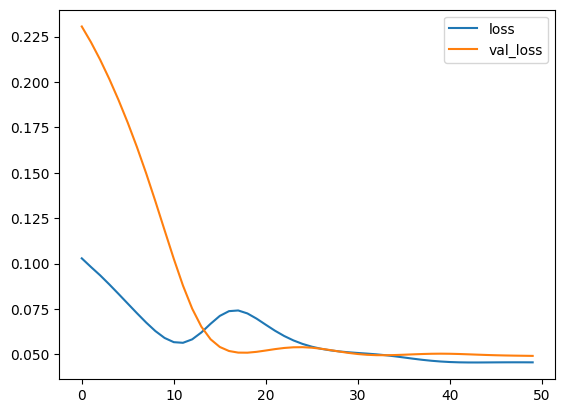

In [112]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

In [113]:
pred_y = model.predict(test_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [114]:
pred_y = scaler.inverse_transform(pred_y)

In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
(mean_absolute_error(test_y, pred_y), mean_squared_error(test_y, pred_y), r2_score(test_y, pred_y))

(np.float64(24.17886978149414),
 np.float64(1165.9111739209393),
 -0.192130446434021)

# Boosting

In [117]:
X, y = train_df.drop(columns=[target]), train_df[target]

In [118]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, shuffle=False)

In [119]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [121]:
lag = 5
(train_X.shape[0], lag, (train_X.shape[1] // lag))

(97, 5, 3)

In [122]:
from xgboost import XGBRegressor

In [150]:
regressor = XGBRegressor(n_estimators=5).fit(train_X, train_y)

In [151]:
pred_y = regressor.predict(test_X)

In [152]:
(mean_absolute_error(test_y, pred_y), mean_squared_error(test_y, pred_y), r2_score(test_y, pred_y))

(np.float64(22.239535675048828),
 np.float64(1093.8092992877466),
 -0.11840713024139404)

In [153]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [160]:
grid_search = GridSearchCV(
    estimator=XGBRegressor(),
    param_grid={
        "n_estimators": [5, 7, 10, 13, 15, 18],
        "max_depth": [2, 3, 4, 5, 6, 7, 8, 10, 12, 15]
    },
    cv=TimeSeriesSplit(n_splits=5)
)

In [161]:
grid_search.fit(train_X, train_y)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, imp...
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 10, 12, 15],
                         'n_estimators': [5, 7, 10, 13, 15, 18]})

In [162]:
grid_search.best_params_

{'max_depth': 2, 'n_estimators': 5}

In [163]:
regressor = XGBRegressor(n_estimators=5, max_depth=2).fit(train_X, train_y)

In [164]:
pred_y = regressor.predict(test_X)

In [165]:
(mean_absolute_error(test_y, pred_y), mean_squared_error(test_y, pred_y), r2_score(test_y, pred_y))

(np.float64(22.919164886474608),
 np.float64(1161.6441205502947),
 -0.1877673864364624)